<a href="https://colab.research.google.com/github/yeon524/IDS/blob/main/1%2B2%2B3%EC%88%98%EC%A0%95%EB%B2%84%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:


!rm -rf openpack-dataset
!git clone https://github.com/yeon524/openpack-dataset.git -q

import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir("/content/openpack-dataset/docs/data-collection")



rows = []
with open("sessions.md", "r", encoding="utf-8") as f:
    for line in f:

        if "|" not in line:
            continue
        if "Subject" in line or "---" in line:
            continue

        parts = [c.strip() for c in line.split("|") if c.strip()]
        if not parts:
            continue


        if not parts[0].startswith("U0"):
            continue


        if len(parts) >= 7:
            rows.append(parts[:7])

df = pd.DataFrame(rows, columns=["Subject","Session","Scenario",
                                 "Duration","Periods","Start","End"])

print("Raw dataframe shape:", df.shape)
display(df.head())


Raw dataframe shape: (104, 7)


,Subject,Session,Scenario,Duration,Periods,Start,End
0,U0101,S0100,S1,35m36s,20,2021-10-14 11:25:34+09:00,2021-10-14 12:01:10+09:00
1,U0101,S0200,S1,28m54s,20,2021-10-14 13:17:42+09:00,2021-10-14 13:46:36+09:00
2,U0101,S0300,S1,28m58s,20,2021-10-14 14:09:10+09:00,2021-10-14 14:38:08+09:00
3,U0101,S0400,S1,30m55s,20,2021-10-14 14:59:48+09:00,2021-10-14 15:30:43+09:00
4,U0101,S0500,S1,27m35s,20,2021-10-14 15:54:05+09:00,2021-10-14 16:21:40+09:00


In [10]:
import os

base_url = "https://zenodo.org/record/8145223/files"

# 다운로드할 모든 파일 목록
files = [
    "preprocessed-IMU-with-operation-labels.zip",
    "U0101.zip","U0102.zip","U0103.zip","U0104.zip","U0105.zip",
    "U0106.zip","U0107.zip","U0108.zip","U0109.zip","U0110.zip","U0111.zip",
    "U0201.zip","U0202.zip","U0203.zip","U0204.zip","U0205.zip",
    "U0206.zip","U0207.zip","U0208.zip","U0209.zip","U0210.zip"
]

# 다운로드 폴더 생성
os.makedirs("openpack_raw", exist_ok=True)

# ---------- 다운로드 ----------
for f in files:
    url = f"{base_url}/{f}?download=1"
    save_path = f"openpack_raw/{f}"

    print(f"⬇️ Downloading {f} ...")
    !wget -q "{url}" -O "{save_path}"
    print(f"   ✔ Saved to {save_path}")

print("\n🎉 다운로드 완료!")

# ---------- 압축 해제 ----------
os.makedirs("openpack", exist_ok=True)

for f in files:
    zip_path = f"openpack_raw/{f}"
    if f.endswith(".zip"):
        extract_dir = f"openpack/{f.replace('.zip','')}"
        print(f"📦 Extracting {f} ...")
        !unzip -q "{zip_path}" -d "{extract_dir}"

print("\n🎉 모든 파일 다운로드 + 압축 해제 완료!")


⬇️ Downloading preprocessed-IMU-with-operation-labels.zip ...
   ✔ Saved to openpack_raw/preprocessed-IMU-with-operation-labels.zip
⬇️ Downloading U0101.zip ...
   ✔ Saved to openpack_raw/U0101.zip
⬇️ Downloading U0102.zip ...
   ✔ Saved to openpack_raw/U0102.zip
⬇️ Downloading U0103.zip ...
   ✔ Saved to openpack_raw/U0103.zip
⬇️ Downloading U0104.zip ...
   ✔ Saved to openpack_raw/U0104.zip
⬇️ Downloading U0105.zip ...
   ✔ Saved to openpack_raw/U0105.zip
⬇️ Downloading U0106.zip ...
   ✔ Saved to openpack_raw/U0106.zip
⬇️ Downloading U0107.zip ...
   ✔ Saved to openpack_raw/U0107.zip
⬇️ Downloading U0108.zip ...
   ✔ Saved to openpack_raw/U0108.zip
⬇️ Downloading U0109.zip ...
   ✔ Saved to openpack_raw/U0109.zip
⬇️ Downloading U0110.zip ...
   ✔ Saved to openpack_raw/U0110.zip
⬇️ Downloading U0111.zip ...
   ✔ Saved to openpack_raw/U0111.zip
⬇️ Downloading U0201.zip ...
   ✔ Saved to openpack_raw/U0201.zip
⬇️ Downloading U0202.zip ...
   ✔ Saved to openpack_raw/U0202.zip
⬇️ Downloa

In [12]:
import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) sessions.md에서 Subject, Session, Scenario 읽기
sessions_md_path = "/content/openpack-dataset/docs/data-collection/sessions.md"

rows = []
with open(sessions_md_path, "r", encoding="utf-8") as f:
    for line in f:
        if "|" not in line:
            continue
        if "Subject" in line or "---" in line:
            continue

        parts = [c.strip() for c in line.split("|") if c.strip()]
        if not parts:
            continue

        if not parts[0].startswith("U0"):
            continue

        rows.append(parts[:7])

sessions_df = pd.DataFrame(
    rows,
    columns=["Subject", "Session", "Scenario", "Duration", "Periods", "Start", "End"]
)

# Scenario는 S1, S2, S3, S4 같은 형식
sessions_df = sessions_df[["Subject", "Session", "Scenario"]]
sessions_df.head()


,Subject,Session,Scenario
0,U0101,S0100,S1
1,U0101,S0200,S1
2,U0101,S0300,S1
3,U0101,S0400,S1
4,U0101,S0500,S1


In [17]:
import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

# 1) sessions.md 읽어서 매핑 만들기
sessions_md_path = "/content/openpack-dataset/docs/data-collection/sessions.md"

rows = []
with open(sessions_md_path, "r", encoding="utf-8") as f:
    for line in f:
        if "|" not in line:
            continue
        if "Subject" in line or "---" in line:
            continue

        parts = [c.strip() for c in line.split("|") if c.strip()]
        if not parts:
            continue
        if not parts[0].startswith("U0"):
            continue

        rows.append(parts[:7])

sessions_df = pd.DataFrame(
    rows,
    columns=["Subject", "Session", "Scenario", "Duration", "Periods", "Start", "End"]
)[["Subject","Session","Scenario"]]

sessions_df.head()


,Subject,Session,Scenario
0,U0101,S0100,S1
1,U0101,S0200,S1
2,U0101,S0300,S1
3,U0101,S0400,S1
4,U0101,S0500,S1


In [18]:
BASE = "/content/openpack"   # zip을 풀어둔 최상위 폴더

all_rows = []

# /content/openpack/U0xx/annotation/openpack-actions/S*.csv 찾기
action_files = glob(os.path.join(BASE, "U0*", "annotation", "openpack-actions", "S*.csv"))
print("찾은 csv 개수:", len(action_files))

for fpath in action_files:
    # 예: /content/openpack/U0101/annotation/openpack-actions/S0100.csv
    parts = fpath.split(os.sep)
    subject_id = parts[-4]                          # U0101
    session_id = os.path.splitext(parts[-1])[0]     # S0100

    df = pd.read_csv(fpath)

    # start/end 없으면 스킵
    if not {"start","end"}.issubset(df.columns):
        continue

    df["Subject"] = subject_id
    df["Session"] = session_id

    df["start_dt"] = pd.to_datetime(df["start"], errors="coerce")
    df["end_dt"]   = pd.to_datetime(df["end"], errors="coerce")

    df["duration_sec"] = (df["end_dt"] - df["start_dt"]).dt.total_seconds()

    all_rows.append(df[["Subject","Session","duration_sec"]])

if not all_rows:
    raise ValueError("❌ S*.csv 파일을 하나도 못 읽었어. 경로 다시 체크해줘!")

raw = pd.concat(all_rows, ignore_index=True)
print("총 row 수:", len(raw))
print(raw.head())


찾은 csv 개수: 99
총 row 수: 51025
  Subject Session  duration_sec
0   U0209   S0200         2.221
1   U0209   S0200         0.769
2   U0209   S0200         1.053
3   U0209   S0200         3.162
4   U0209   S0200         1.054


In [19]:
# Subject + Session 기준으로 Scenario 붙이기
raw = raw.merge(sessions_df, on=["Subject","Session"], how="left")

# 1단계: 한 사람이 한 세션에서 평균 period 시간 계산
session_subject_stats = (
    raw.groupby(["Scenario","Subject","Session"])
       .agg(
           mean_period=("duration_sec","mean"),
           n_periods=("duration_sec","count")
       )
       .reset_index()
)

# 2단계: 같은 세션을 수행한 여러 사람 간 consistency
session_consistency = (
    session_subject_stats.groupby(["Scenario","Session"])
        .agg(
            n_subjects=("Subject","nunique"),
            mean_period=("mean_period","mean"),
            std_period=("mean_period","std"),
            mad_period=("mean_period", lambda x: np.mean(np.abs(x - x.mean())))
        )
        .reset_index()
)

# 최소 2명 이상 수행한 세션만
session_consistency = session_consistency[session_consistency["n_subjects"] >= 2]

print("=== Session-level consistency ===")
print(session_consistency)


=== Session-level consistency ===
   Scenario Session  n_subjects  mean_period  std_period  mad_period
4       ALL   S0100           3     2.184036    0.307805    0.232769
5       ALL   S0200           3     2.421669    0.820811    0.619845
7       ALL   S0400           5     2.426479    0.172318    0.149187
8       ALL   S0500           3     1.977543    0.398699    0.293455
9        S1   S0100          10     2.879290    0.446980    0.363966
10       S1   S0200          10     2.494681    0.515408    0.323462
11       S1   S0300          10     2.386768    0.191737    0.129440
12       S1   S0400          10     2.369842    0.204796    0.150364
13       S1   S0500           9     2.320193    0.371122    0.260934
14       S2   S0100          10     2.366732    0.238464    0.200066
15       S2   S0200           9     2.053194    0.186718    0.160747
18       S3   S0300          10     2.209528    0.261577    0.212920
19       S3   S0400           9     2.143570    0.205854    0.159590


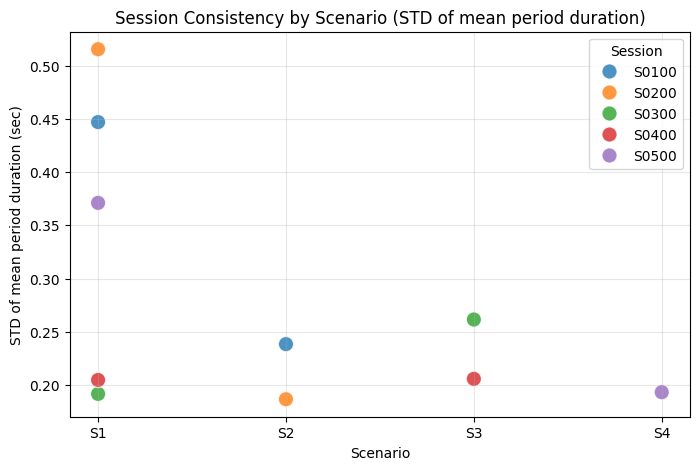

In [20]:
plot_df = session_consistency[session_consistency["Scenario"].isin(["S1","S2","S3","S4"])]

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=plot_df,
    x="Scenario",          # S1~S4
    y="std_period",        # 세션 내 사람들 평균 period 시간의 표준편차
    hue="Session",         # S0100, S0200...
    s=120,
    alpha=0.8
)

plt.title("Session Consistency by Scenario (STD of mean period duration)")
plt.xlabel("Scenario")
plt.ylabel("STD of mean period duration (sec)")
plt.grid(True, alpha=0.3)
plt.show()


In [21]:
# session_subject_stats: (Scenario, Subject, Session, mean_period, n_ops) 있었지!

# 1) 시나리오별 평균 period 시간
scenario_mean = (
    session_subject_stats.groupby("Scenario")["mean_period"]
    .mean()
    .rename("scenario_mean_period")
    .reset_index()
)

# 2) 각 Subject-Session 행에 시나리오 평균 붙이기
dev_df = session_subject_stats.merge(scenario_mean, on="Scenario", how="left")

# 3) 편차 = 개인 mean_period - 시나리오 평균
dev_df["deviation"] = dev_df["mean_period"] - dev_df["scenario_mean_period"]

dev_df.head()


,Scenario,Subject,Session,mean_period,n_periods,scenario_mean_period,deviation
0,"1,2,3,4,5,6,7,8,9,10,",U0103,S0100,2.823489,266,2.670586,0.152903
1,"1,2,3,4,5,6,7,8,9,10,",U0108,S0400,2.517683,543,2.670586,-0.152903
2,"10,11,12,13,14,15,16,17,18,19,20,",U0107,S0300,2.333562,532,2.333562,0.000000
3,"17,18,19,20,",U0109,S0100,3.024056,549,3.024056,0.000000
4,ALL,U0101,S0100,2.533189,533,2.283638,0.249551


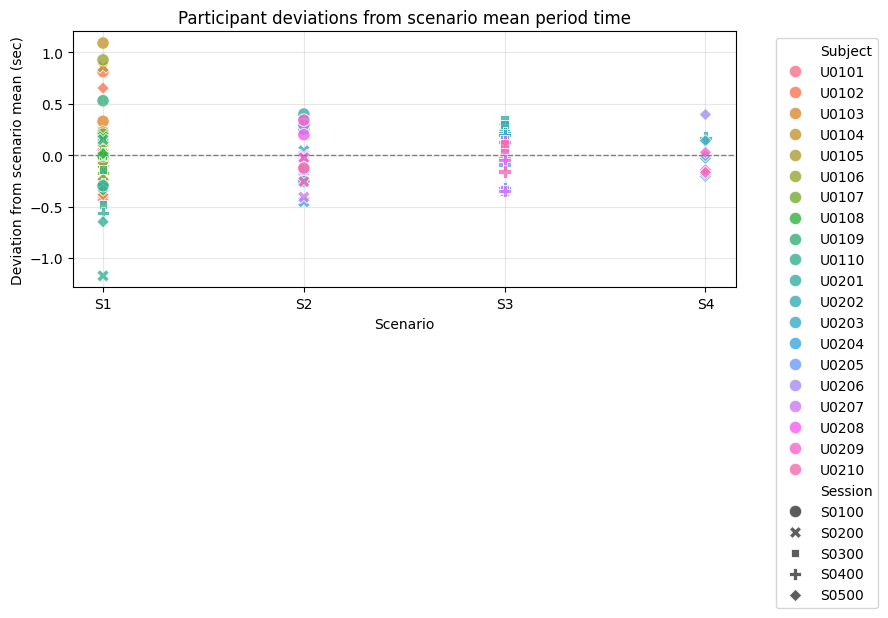

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))

sns.scatterplot(
    data=dev_df[dev_df["Scenario"].isin(["S1","S2","S3","S4"])],
    x="Scenario",
    y="deviation",
    hue="Subject",      # 참가자별로 색 다르게
    style="Session",    # 원하면 세션 모양도 다르게
    s=80,
    alpha=0.8
)

plt.axhline(0, color="gray", linestyle="--", linewidth=1)  # 시나리오 평균 기준선

plt.title("Participant deviations from scenario mean period time")
plt.xlabel("Scenario")
plt.ylabel("Deviation from scenario mean (sec)")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")  # 범례 옆으로 빼기
plt.tight_layout()
plt.show()


In [24]:
# 참가자별 consistency: 세션 period 평균들의 표준편차
subject_consistency = (
    session_subject_stats.groupby("Subject")["mean_period"]
    .agg(
        subject_mean = "mean",
        subject_std = "std",          # ← 일관성 지표
        subject_mad = lambda x: np.mean(np.abs(x - x.mean()))
    )
    .reset_index()
)
subject_consistency.head()



,Subject,subject_mean,subject_std,subject_mad
0,U0101,2.283992,0.202844,0.174833
1,U0102,2.843907,0.368323,0.306418
2,U0103,2.438509,0.260986,0.202975
3,U0104,3.033715,0.444047,0.395559
4,U0105,2.494739,0.164502,0.140956


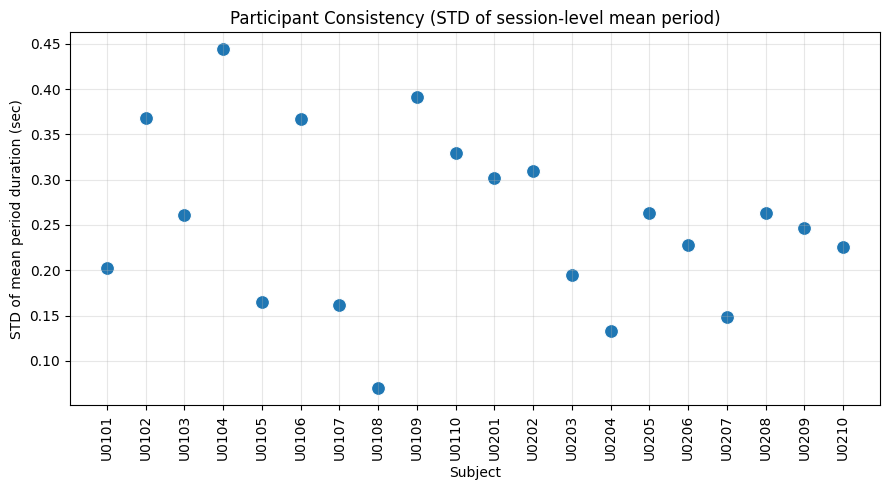

In [25]:
plt.figure(figsize=(9,5))
sns.scatterplot(
    data=subject_consistency,
    x="Subject",
    y="subject_std",
    s=100
)

plt.title("Participant Consistency (STD of session-level mean period)")
plt.ylabel("STD of mean period duration (sec)")
plt.xlabel("Subject")
plt.xticks(rotation=90)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [26]:
subj_scenario_consistency = (
    session_subject_stats.groupby(["Subject", "Scenario"])["mean_period"]
    .agg(std_period="std", mean_period="mean")
    .reset_index()
)


In [28]:
subj_scenario_consistency = (
    session_subject_stats
    .groupby(["Subject", "Scenario"])["mean_period"]
    .agg(
        std_period="std",          # 그 시나리오 안에서 이 참가자의 일관성
        mean_period="mean"
    )
    .reset_index()
)


In [29]:
subj_scenario_consistency = subj_scenario_consistency[
    subj_scenario_consistency["Scenario"].isin(["S1", "S2", "S3", "S4"])
]

# 보기 좋게 순서 고정
scenario_order = ["S1", "S2", "S3", "S4"]


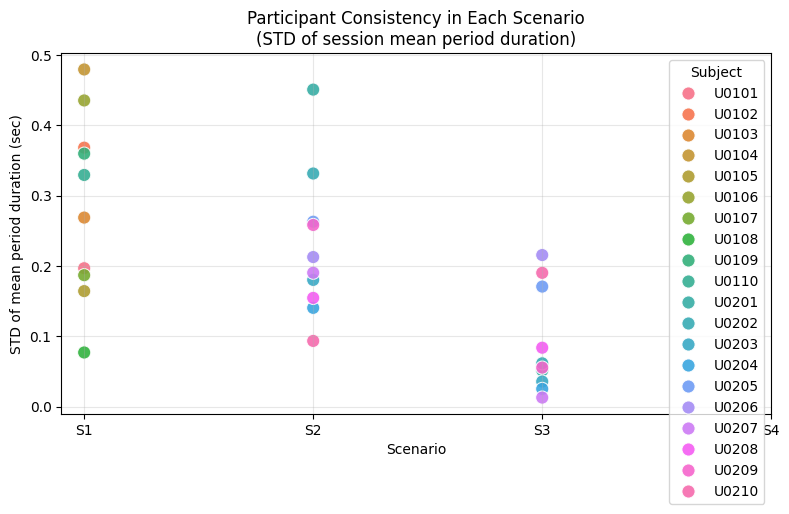

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

sns.scatterplot(
    data=subj_scenario_consistency,
    x="Scenario",
    y="std_period",
    hue="Subject",             # 참가자별 색
    s=90,
    alpha=0.9
)

plt.title("Participant Consistency in Each Scenario\n(STD of session mean period duration)")
plt.xlabel("Scenario")
plt.ylabel("STD of mean period duration (sec)")
plt.grid(alpha=0.3)
plt.xticks(scenario_order)
plt.tight_layout()
plt.show()


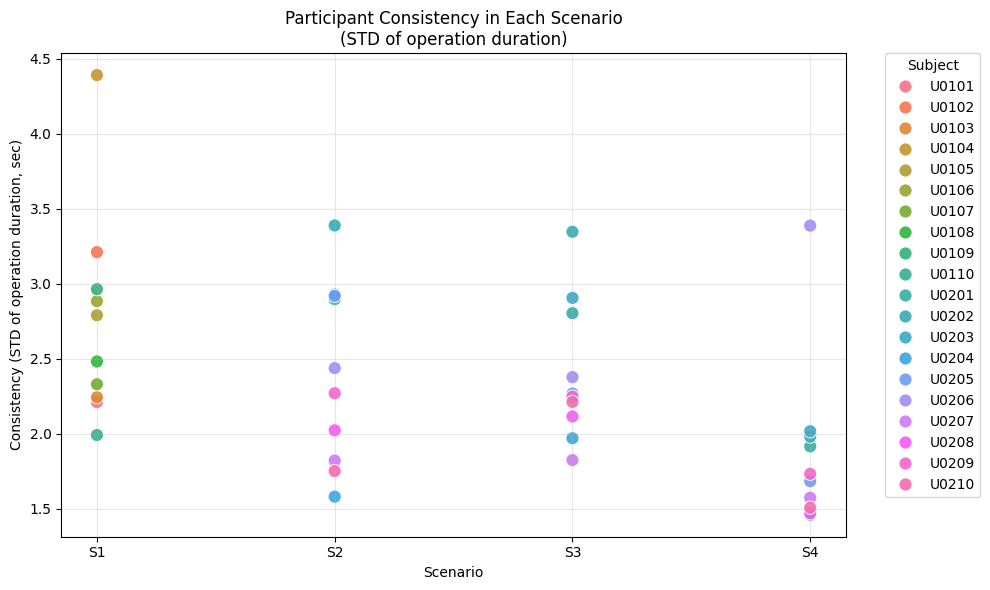

In [33]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=subj_scenario_consistency,
    x="Scenario",
    y="std_period",
    hue="Subject",
    s=90,
    alpha=0.9
)

plt.title("Participant Consistency in Each Scenario\n(STD of operation duration)")
plt.xlabel("Scenario")
plt.ylabel("Consistency (STD of operation duration, sec)")
plt.grid(alpha=0.3)
plt.xticks(["S1", "S2", "S3", "S4"])

# ⭐ Legend를 오른쪽 바깥으로 이동
plt.legend(
    title="Subject",
    bbox_to_anchor=(1.05, 1),     # 오른쪽 바깥
    loc="upper left",
    borderaxespad=0
)

plt.tight_layout()
plt.show()


=== sessions_df head ===
  Subject Session Scenario
0   U0101   S0100       S1
1   U0101   S0200       S1
2   U0101   S0300       S1
3   U0101   S0400       S1
4   U0101   S0500       S1
Found action files: 99

=== raw_ops head ===
  Subject Session       operation_name  duration_sec
0   U0209   S0200              Picking         2.221
1   U0209   S0200  Relocate Item Label         0.769
2   U0209   S0200  Relocate Item Label         1.053
3   U0209   S0200         Assemble Box         3.162
4   U0209   S0200         Assemble Box         1.054

=== raw_ops with Scenario head ===
  Subject Session       operation_name  duration_sec Scenario
0   U0209   S0200              Picking         2.221       S2
1   U0209   S0200  Relocate Item Label         0.769       S2
2   U0209   S0200  Relocate Item Label         1.053       S2
3   U0209   S0200         Assemble Box         3.162       S2
4   U0209   S0200         Assemble Box         1.054       S2

===== Scenario S1 =====
Top 10 operations

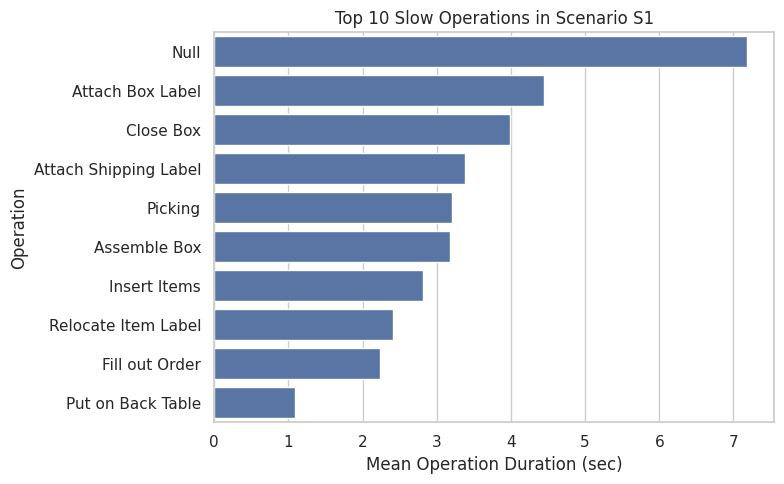


===== Scenario S2 =====
Top 10 operations by mean duration in S2:
           operation_name  mean_duration  std_duration  n_ops
6                    Null       7.342680     12.181249    100
3               Close Box       3.595634      2.122510    807
1        Attach Box Label       3.372867      1.151140    400
2   Attach Shipping Label       3.138090      2.128244    793
0            Assemble Box       2.770394      2.093548   1656
7                 Picking       2.626854      1.696398    964
5            Insert Items       2.532688      2.971547    692
9     Relocate Item Label       2.036233      2.577010   1142
4          Fill out Order       1.981584      2.052268   1188
10             Scan Label       0.858055      1.069849   2412


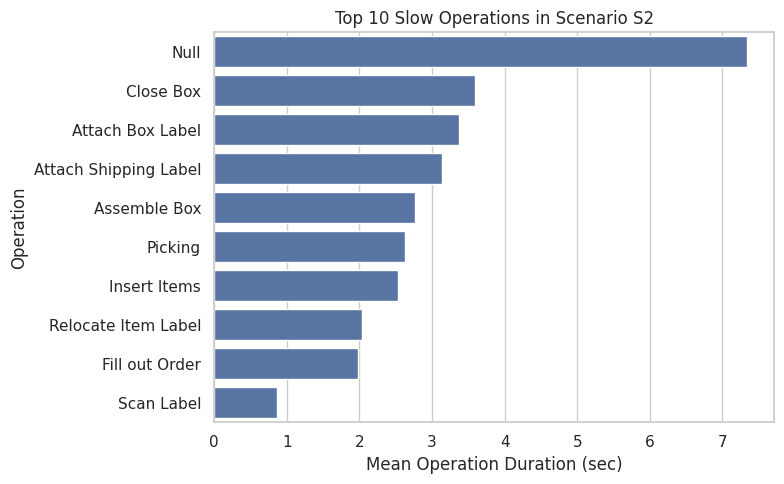


===== Scenario S3 =====
Top 10 operations by mean duration in S3:
           operation_name  mean_duration  std_duration  n_ops
6                    Null       5.223487      8.810225     76
3               Close Box       3.509873      2.037789    789
1        Attach Box Label       2.945023      1.024003    391
2   Attach Shipping Label       2.943972      2.033840    784
5            Insert Items       2.796386      3.355424    647
9     Relocate Item Label       2.678315      3.803004   1195
0            Assemble Box       2.678036      1.992073   1405
7                 Picking       2.494134      1.634476   1028
4          Fill out Order       1.880180      1.910962   1175
10             Scan Label       0.783122      0.889779   2365


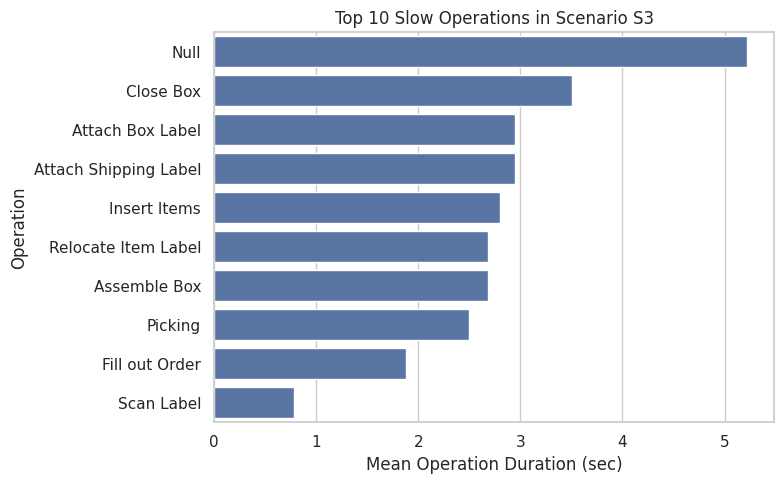


===== Scenario S4 =====
Top 10 operations by mean duration in S4:
           operation_name  mean_duration  std_duration  n_ops
3               Close Box       2.947466      1.684399    393
6                    Null       2.669839      2.788175     31
2   Attach Shipping Label       2.606966      1.629483    388
1        Attach Box Label       2.604124      1.003549    194
0            Assemble Box       2.293369      1.535555    712
5            Insert Items       2.091775      2.278085    325
9     Relocate Item Label       2.062787      2.477014    588
7                 Picking       2.045151      1.371223    524
4          Fill out Order       1.695800      1.780468    581
10             Scan Label       0.728334      0.828073   1170


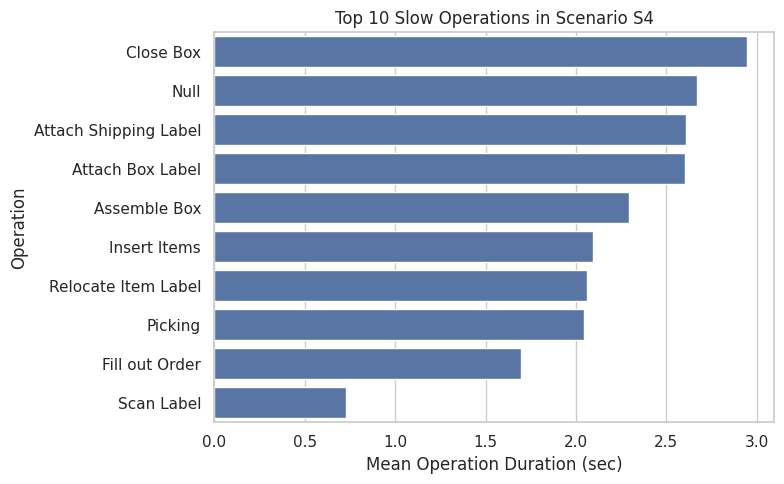

In [42]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

sns.set(style="whitegrid")

# ---------------------------------------------------
# 1. sessions.md에서 Subject–Session–Scenario 매핑 읽기
# ---------------------------------------------------
sessions_md_path = "/content/openpack-dataset/docs/data-collection/sessions.md"

rows = []
with open(sessions_md_path, "r", encoding="utf-8") as f:
    for line in f:
        if "|" not in line:
            continue
        if "Subject" in line or "---" in line:
            continue

        parts = [c.strip() for c in line.split("|") if c.strip()]
        if not parts:
            continue
        if not parts[0].startswith("U0"):
            continue

        rows.append(parts[:7])

sessions_df = pd.DataFrame(
    rows,
    columns=["Subject", "Session", "Scenario", "Duration", "Periods", "Start", "End"]
)[["Subject", "Session", "Scenario"]]

print("=== sessions_df head ===")
print(sessions_df.head())

# ---------------------------------------------------
# 2. zip에서 action CSV 전부 읽기 (start/end → duration + operation)
#    경로 예: /content/openpack/U0101/annotation/openpack-actions/S0100.csv
# ---------------------------------------------------
BASE = "/content/openpack"  # unzip 해둔 폴더

all_rows = []

action_files = glob(os.path.join(BASE, "U0*", "annotation", "openpack-actions", "S*.csv"))
print("Found action files:", len(action_files))

for fpath in action_files:
    parts = fpath.split(os.sep)
    subject_id = parts[-4]                       # U0101
    session_id = os.path.splitext(parts[-1])[0]  # S0100

    df = pd.read_csv(fpath)

    # start, end 있는지 확인
    if not {"start", "end"}.issubset(df.columns):
        continue

    # operation 컬럼명 찾기 (operation 또는 op_id 등)
    op_col = None
    for cand in ["operation", "op", "op_id", "label"]:
        if cand in df.columns:
            op_col = cand
            break

    if op_col is None:
        # 그래도 진행은 할 수 있지만, operation 이름이 없으면 의미가 적음
        # 여기서는 없으면 스킵하도록.
        continue

    df["Subject"] = subject_id
    df["Session"] = session_id
    df["operation_name"] = df[op_col].astype(str)

    df["start_dt"] = pd.to_datetime(df["start"], errors="coerce")
    df["end_dt"]   = pd.to_datetime(df["end"], errors="coerce")
    df["duration_sec"] = (df["end_dt"] - df["start_dt"]).dt.total_seconds()

    all_rows.append(df[["Subject", "Session", "operation_name", "duration_sec"]])

if not all_rows:
    raise ValueError("No action rows collected. Check file paths and column names.")

raw_ops = pd.concat(all_rows, ignore_index=True)
print("\n=== raw_ops head ===")
print(raw_ops.head())

# ---------------------------------------------------
# 3. Scenario 붙이기 (Subject + Session 기준 merge)
# ---------------------------------------------------
raw_ops = raw_ops.merge(sessions_df, on=["Subject", "Session"], how="left")
print("\n=== raw_ops with Scenario head ===")
print(raw_ops.head())

# ---------------------------------------------------
# 4. 시나리오별 operation 영향 분석:
#    - 각 Scenario 안에서 operation별 평균 duration, std, count
#    - count 기준으로 너무 희귀한 operation은 제거 (min_count로 조정)
#    - 상위 N개를 barplot으로 시각화
# ---------------------------------------------------
scenarios = ["S1", "S2", "S3", "S4"]
min_count = 30   # 이 값보다 적게 나온 operation은 제외 (원하면 줄여도 됨)
top_n = 10       # 상위 몇 개의 느린 operation을 볼지

for sc in scenarios:
    print(f"\n===== Scenario {sc} =====")

    sub = raw_ops[raw_ops["Scenario"] == sc].copy()
    if sub.empty:
        print(f"No data for {sc}")
        continue

    op_stats = (
        sub.groupby("operation_name")["duration_sec"]
           .agg(
               mean_duration="mean",
               std_duration="std",
               n_ops="count"
           )
           .reset_index()
    )

    # 희귀 operation 제거
    op_stats = op_stats[op_stats["n_ops"] >= min_count]

    if op_stats.empty:
        print(f"No operations with at least {min_count} occurrences in {sc}")
        continue

    # 평균 duration 기준 내림차순 정렬 (느린 작업이 위로)
    op_stats = op_stats.sort_values("mean_duration", ascending=False)

    print(f"Top {top_n} operations by mean duration in {sc}:")
    print(op_stats.head(top_n))

    # -----------------------------
    # Bar plot (Top N 느린 operation)
    # -----------------------------
    plt.figure(figsize=(8,5))
    sns.barplot(
        data=op_stats.head(top_n),
        x="mean_duration",
        y="operation_name"
    )
    plt.title(f"Top {top_n} Slow Operations in Scenario {sc}")
    plt.xlabel("Mean Operation Duration (sec)")
    plt.ylabel("Operation")
    plt.tight_layout()
    plt.show()



=== Top Operations by Mean Duration (All Scenarios Combined) ===
           operation_name  mean_duration  std_duration  n_ops
6                    Null       6.332836      9.241261    568
1        Attach Box Label       3.739636      1.600145   2258
3               Close Box       3.717895      2.290394   4526
2   Attach Shipping Label       3.160532      2.162194   4470
0            Assemble Box       2.929467      2.354413   8839
7                 Picking       2.781974      1.869483   5258
5            Insert Items       2.705444      3.379394   3957
9     Relocate Item Label       2.322470      2.951351   6503
4          Fill out Order       2.057655      2.152479   6745
8       Put on Back Table       0.951567      0.486061   2933
10             Scan Label       0.910307      1.591068  13542


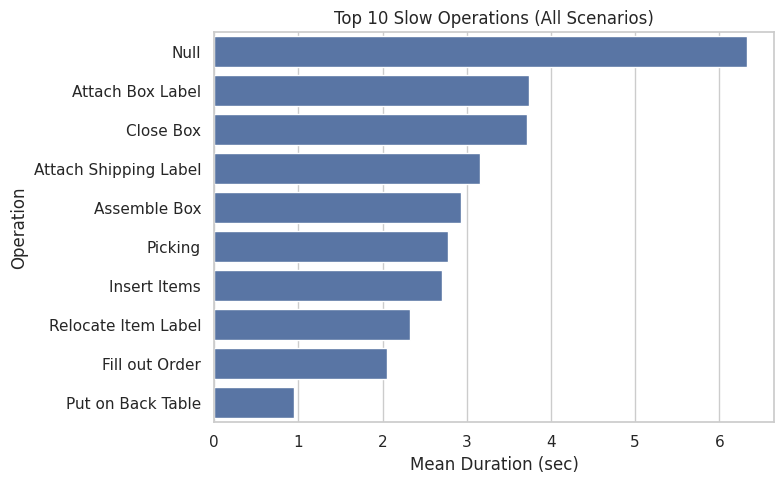

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------
# 1) Null duration 제거
# ------------------------------
ops_all = raw_ops.dropna(subset=["duration_sec"]).copy()

# ------------------------------
# 2) 전체 operation별 평균 duration 계산
# ------------------------------
op_stats_all = (
    ops_all.groupby("operation_name")["duration_sec"]
           .agg(
               mean_duration="mean",
               std_duration="std",
               n_ops="count"
           )
           .reset_index()
)

# ------------------------------
# 3) 너무 적게 등장한 작업 제거 (희귀 operation 제외)
# ------------------------------
min_count = 30   # 원하면 20~50 사이에서 조절 가능

op_stats_all = op_stats_all[op_stats_all["n_ops"] >= min_count]

# ------------------------------
# 4) 평균 duration 기준 내림차순 정렬
# ------------------------------
op_stats_all = op_stats_all.sort_values("mean_duration", ascending=False)

print("\n=== Top Operations by Mean Duration (All Scenarios Combined) ===")
print(op_stats_all.head(15))

# ------------------------------
# 5) Bar Plot – 전체에서 가장 시간이 오래 걸리는 작업 Top 10
# ------------------------------
top_n = 10

plt.figure(figsize=(8,5))
sns.barplot(
    data=op_stats_all.head(top_n),
    x="mean_duration",
    y="operation_name"
)
plt.title(f"Top {top_n} Slow Operations (All Scenarios)")
plt.xlabel("Mean Duration (sec)")
plt.ylabel("Operation")
plt.tight_layout()
plt.show()


In [48]:
import re
import numpy as np

def parse_experience(x):
    """experience 값을 m 또는 y 단위를 인식하여 months 로 변환."""
    if pd.isna(x):
        return np.nan

    x = x.strip().lower()

    # case: "12m", "8m", "3 m"
    m = re.match(r"(\d+)\s*m", x)
    if m:
        return int(m.group(1))

    # case: "2y", "3 y", "1y"
    y = re.match(r"(\d+)\s*y", x)
    if y:
        return int(y.group(1)) * 12

    # 혹시 숫자만 있을 경우 → 그대로 months 로 간주
    if x.isdigit():
        return int(x)

    return np.nan


# 적용
subjects_df["Exp_months"] = subjects_df["Experience"].apply(parse_experience)


In [49]:
# ============================================
# 🌸 Pretty Plot Theme (토끼요정 테마)
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    style="whitegrid",
    font_scale=1.1,
    rc={
        "axes.edgecolor": "#666666",
        "grid.color": "#DDDDDD",
        "axes.labelweight": "bold",
        "axes.titleweight": "bold",
        "axes.titlepad": 12,
        "figure.dpi": 120,
        "font.family": "sans-serif",
    }
)

pretty_palette = sns.color_palette("pastel")
sns.set_palette(pretty_palette)

In [50]:
def plot_meta(meta, title_suffix):

    # =======================
    # A) Age vs Duration
    # =======================
    plt.figure(figsize=(7,5))
    sns.regplot(
        data=meta,
        x="Age_num",
        y="mean_duration",
        scatter_kws={"s":90, "alpha":0.8, "edgecolor":"#444"},
        line_kws={"color":"#FF9999", "linewidth":2},
    )
    plt.title(f"Age vs Mean Task Duration\n({title_suffix})", fontsize=14)
    plt.xlabel("Age (years)")
    plt.ylabel("Mean Task Duration (sec)")
    plt.tight_layout()
    plt.show()


    # =======================
    # B) Experience vs Duration
    # =======================
    plt.figure(figsize=(7,5))
    sns.regplot(
        data=meta,
        x="Exp_months",
        y="mean_duration",
        scatter_kws={"s":90, "alpha":0.8, "edgecolor":"#444"},
        line_kws={"color":"#99CCFF", "linewidth":2},
    )
    plt.title(f"Experience vs Mean Task Duration\n({title_suffix})", fontsize=14)
    plt.xlabel("Experience (months)")
    plt.ylabel("Mean Task Duration (sec)")
    plt.tight_layout()
    plt.show()


    # =======================
    # C) Sex vs Duration
    # =======================
    plt.figure(figsize=(6,5))
    sns.boxplot(
        data=meta,
        x="Sex",
        y="mean_duration",
        linewidth=1.5,
        width=0.5,
        palette="pastel"
    )
    sns.stripplot(
        data=meta,
        x="Sex",
        y="mean_duration",
        color="#555",
        alpha=0.7,
        size=7
    )
    plt.title(f"Mean Task Duration by Sex\n({title_suffix})", fontsize=14)
    plt.xlabel("Sex")
    plt.ylabel("Mean Task Duration (sec)")
    plt.tight_layout()
    plt.show()


    # =======================
    # D) Dominant Hand vs Duration
    # =======================
    plt.figure(figsize=(6,5))
    sns.boxplot(
        data=meta,
        x="DominantHand",
        y="mean_duration",
        width=0.5,
        linewidth=1.5,
        palette="pastel"
    )
    sns.stripplot(
        data=meta,
        x="DominantHand",
        y="mean_duration",
        color="#555",
        alpha=0.7,
        size=7
    )
    plt.title(f"Mean Task Duration by Dominant Hand\n({title_suffix})", fontsize=14)
    plt.xlabel("Dominant Hand")
    plt.ylabel("Mean Task Duration (sec)")
    plt.tight_layout()
    plt.show()

=== subjects_df (with Age_num, Exp_months) ===
  Subject Sex  Age DominantHand Experience  Note  Age_num  Exp_months
0   U0101   F    -        Right          -  None      NaN           0
1   U0102   F    -        Right          -  None      NaN           0
2   U0103   F  50s        Right    6 Month  None     50.0           6
3   U0104   F  50s        Right    1 Month  None     50.0           1
4   U0105   F  30s        Right     4 Year  None     30.0          48

===== Scenario S1 =====


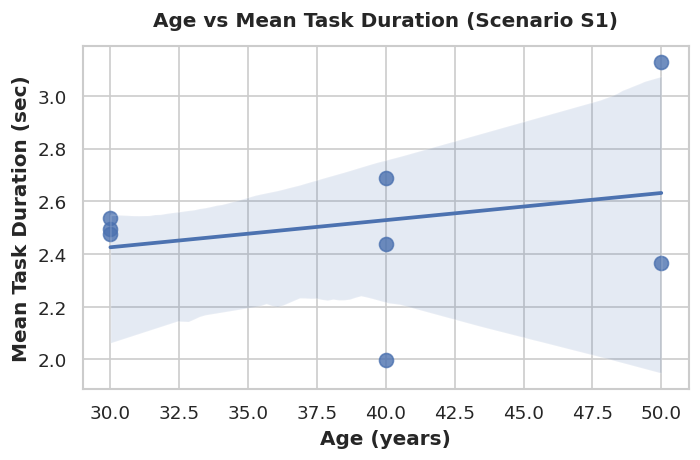

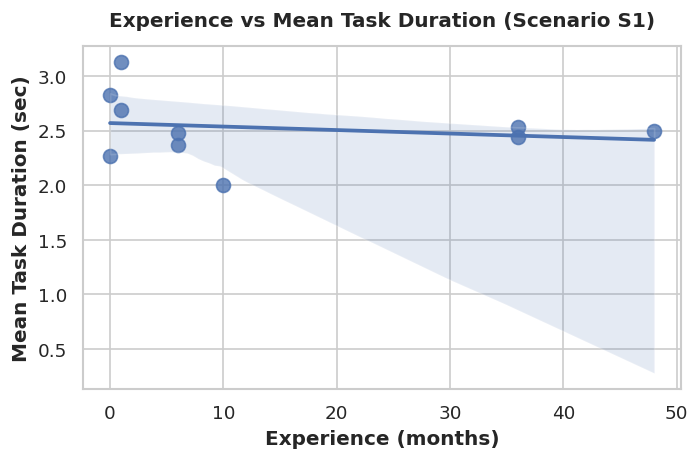

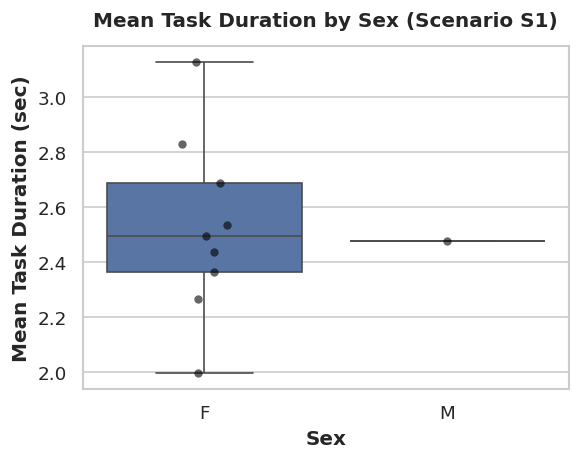

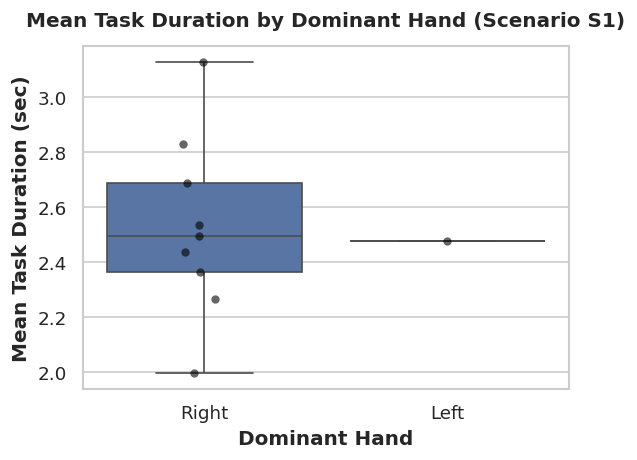


===== Scenarios S2–S4 Combined =====


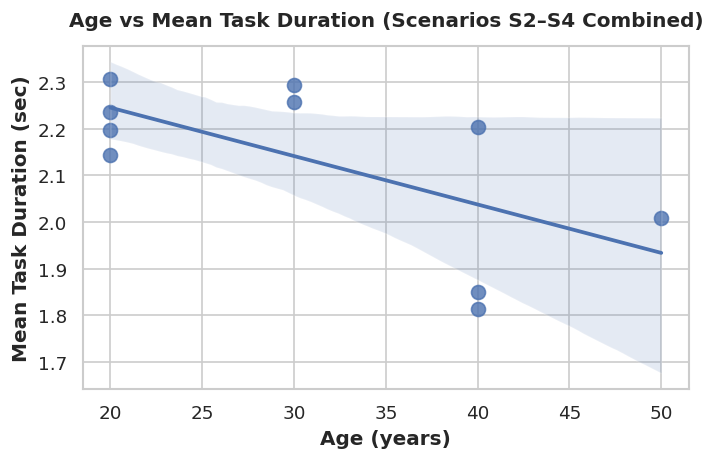

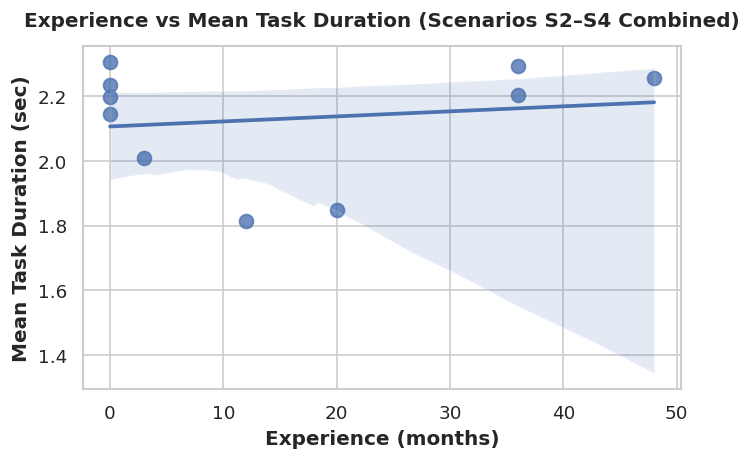

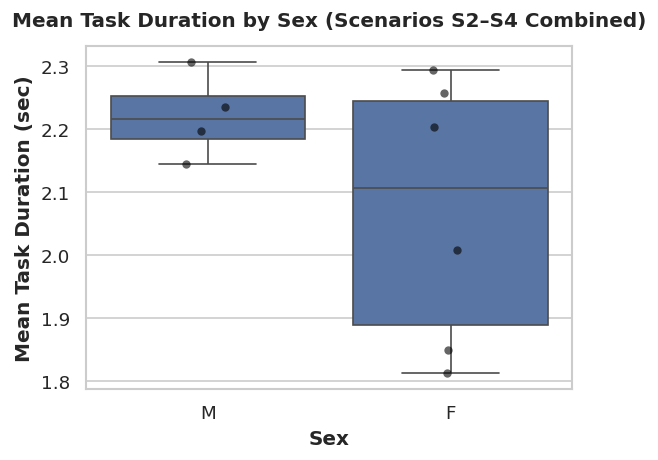

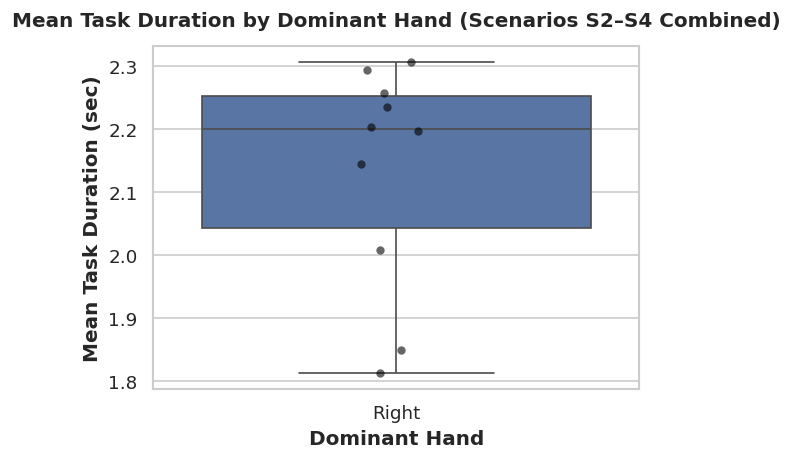


===== All Scenarios (S1–S4) Combined =====


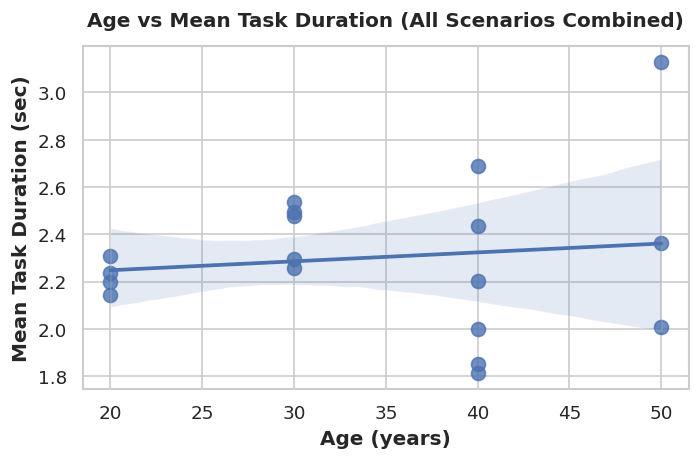

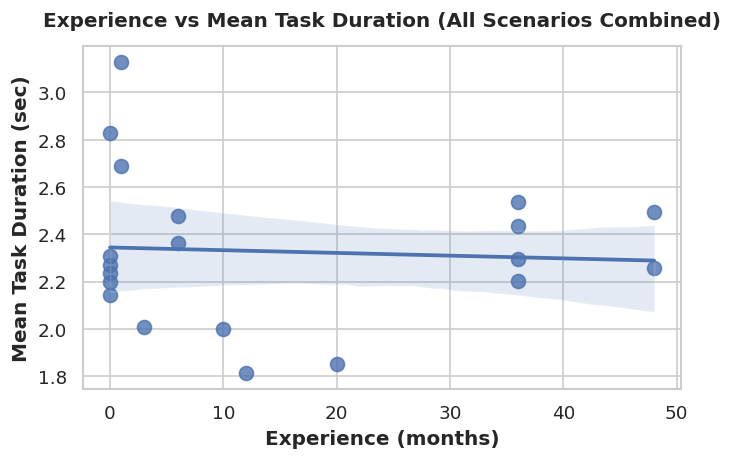

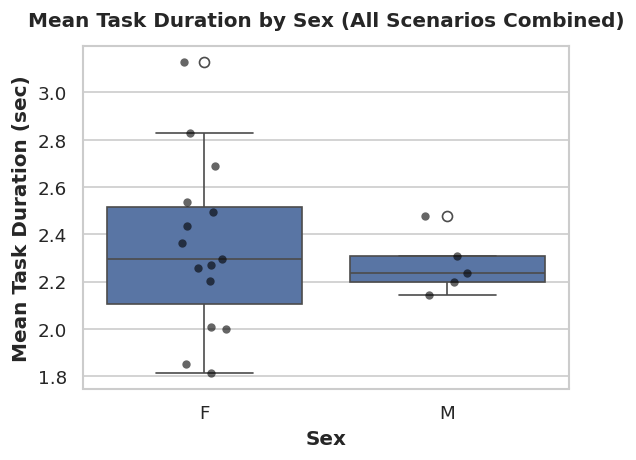

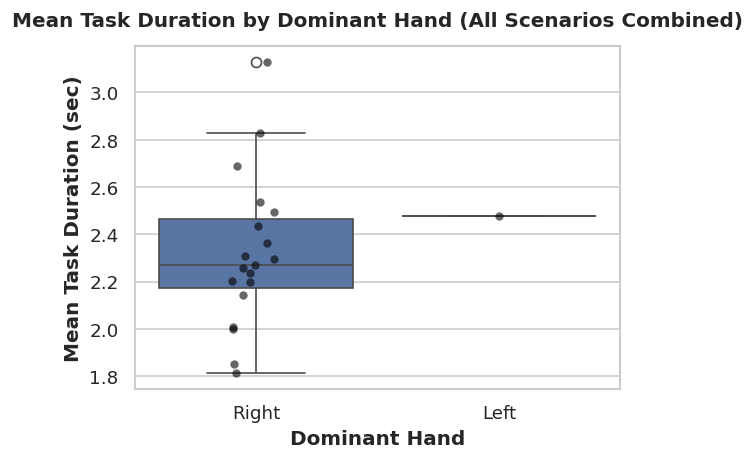

In [51]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ============================================
# 0. subjects.md 다시 읽어서 사람 특성 정리
# ============================================
subjects_md_path = "/content/openpack-dataset/docs/data-collection/subjects.md"

rows = []
with open(subjects_md_path, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if "|" not in line:
            continue
        if "Subject" in line or "---" in line:
            continue

        parts = [c.strip() for c in line.split("|") if c.strip()]
        if not parts:
            continue
        if not parts[0].startswith("U0"):
            continue

        # Subject, Sex, Age, Dominant Hand, Experience, Note (앞에서 봤던 구조)
        rows.append(parts[:6])

subjects_df = pd.DataFrame(
    rows,
    columns=["Subject", "Sex", "Age", "DominantHand", "Experience", "Note"]
)

# -----------------------------
# Age: "20s" → 20
# -----------------------------
def parse_age(age_str):
    if pd.isna(age_str):
        return np.nan
    s = str(age_str).strip()
    if s in ["", "-"]:
        return np.nan
    m = re.match(r"(\d+)", s)
    if m:
        return int(m.group(1))
    return np.nan

subjects_df["Age_num"] = subjects_df["Age"].apply(parse_age)

# -----------------------------
# Experience: "6 Month", "2 Years", "12m", "3y" → months 로 통일
# -----------------------------
def parse_experience(x):
    if pd.isna(x):
        return np.nan

    s = str(x).strip().lower()
    if s in ["", "-", "none"]:
        return 0

    # 패턴 1: "6 month", "2 years"
    m1 = re.match(r"(\d+)\s*(month|months|year|years)", s)
    if m1:
        num = int(m1.group(1))
        unit = m1.group(2)
        if "year" in unit:
            return num * 12
        else:
            return num

    # 패턴 2: "12m", "3y"
    m2 = re.match(r"(\d+)\s*(m|y)", s)
    if m2:
        num = int(m2.group(1))
        unit = m2.group(2)
        if unit == "y":
            return num * 12
        else:
            return num

    # 숫자만 있으면 그냥 개월로 간주
    if s.isdigit():
        return int(s)

    return np.nan

subjects_df["Exp_months"] = subjects_df["Experience"].apply(parse_experience)

print("=== subjects_df (with Age_num, Exp_months) ===")
print(subjects_df.head())


# ============================================
# 1. 시나리오별/통합별로 참가자 평균 duration 계산 함수
# ============================================
def compute_meta_for_scenarios(scenario_list, label=""):
    """
    scenario_list: ["S1"], ["S2","S3","S4"], ["S1","S2","S3","S4"] 등
    label: 그래프 title에 붙일 텍스트
    """
    sub = raw[raw["Scenario"].isin(scenario_list)].copy()

    if sub.empty:
        print(f"No data for scenarios: {scenario_list}")
        return None

    # 참가자별 평균 duration
    perf = (
        sub.groupby("Subject")["duration_sec"]
           .agg(mean_duration="mean", std_duration="std", n_ops="count")
           .reset_index()
    )

    meta = perf.merge(subjects_df, on="Subject", how="left")
    meta["scenario_label"] = label
    return meta


# ============================================
# 2. 세 가지 버전 메타 데이터 만들기
#    (1) S1만
#    (2) S2~S4 묶음
#    (3) S1~S4 전체
# ============================================
meta_s1   = compute_meta_for_scenarios(["S1"], label="Scenario S1")
meta_s234 = compute_meta_for_scenarios(["S2", "S3", "S4"], label="Scenarios S2–S4")
meta_all  = compute_meta_for_scenarios(["S1", "S2", "S3", "S4"], label="All Scenarios")

# ============================================
# 3. 그래프 그리는 공통 함수
# ============================================
def plot_meta(meta, title_suffix):
    if meta is None or meta.empty:
        print(f"[WARN] No data for {title_suffix}")
        return

    # A. Age vs Duration
    plt.figure(figsize=(6,4))
    sns.regplot(
        data=meta,
        x="Age_num",
        y="mean_duration",
        scatter_kws={"s":70, "alpha":0.8}
    )
    plt.title(f"Age vs Mean Task Duration ({title_suffix})")
    plt.xlabel("Age (years)")
    plt.ylabel("Mean Task Duration (sec)")
    plt.tight_layout()
    plt.show()

    # B. Experience vs Duration
    plt.figure(figsize=(6,4))
    sns.regplot(
        data=meta,
        x="Exp_months",
        y="mean_duration",
        scatter_kws={"s":70, "alpha":0.8}
    )
    plt.title(f"Experience vs Mean Task Duration ({title_suffix})")
    plt.xlabel("Experience (months)")
    plt.ylabel("Mean Task Duration (sec)")
    plt.tight_layout()
    plt.show()

    # C. Sex vs Duration
    plt.figure(figsize=(5,4))
    sns.boxplot(data=meta, x="Sex", y="mean_duration")
    sns.stripplot(data=meta, x="Sex", y="mean_duration",
                  color="black", alpha=0.6)
    plt.title(f"Mean Task Duration by Sex ({title_suffix})")
    plt.xlabel("Sex")
    plt.ylabel("Mean Task Duration (sec)")
    plt.tight_layout()
    plt.show()

    # D. Dominant Hand vs Duration
    plt.figure(figsize=(5,4))
    sns.boxplot(data=meta, x="DominantHand", y="mean_duration")
    sns.stripplot(data=meta, x="DominantHand", y="mean_duration",
                  color="black", alpha=0.6)
    plt.title(f"Mean Task Duration by Dominant Hand ({title_suffix})")
    plt.xlabel("Dominant Hand")
    plt.ylabel("Mean Task Duration (sec)")
    plt.tight_layout()
    plt.show()


# ============================================
# 4. 각각 그리기: S1 / S2-4 / All
# ============================================
print("\n===== Scenario S1 =====")
plot_meta(meta_s1, "Scenario S1")

print("\n===== Scenarios S2–S4 Combined =====")
plot_meta(meta_s234, "Scenarios S2–S4 Combined")

print("\n===== All Scenarios (S1–S4) Combined =====")
plot_meta(meta_all, "All Scenarios Combined")

In [52]:
def factor_rank(meta, title=""):
    # 분석 가능한 수치형 컬럼
    cols = ["Age_num", "Exp_months"]

    # Sex, DominantHand 은 수치형으로 변환
    meta = meta.copy()
    meta["Sex_num"] = meta["Sex"].map({"M":1, "F":0})
    meta["Hand_num"] = meta["DominantHand"].map({"Right":1, "Left":0})

    cols += ["Sex_num", "Hand_num"]

    # 상관 계산
    corr_list = []
    for c in cols:
        corr = meta[[c, "mean_duration"]].corr().iloc[0,1]
        corr_list.append((c, corr, abs(corr)))

    df_rank = pd.DataFrame(corr_list, columns=["Factor", "Correlation", "AbsCorrelation"])
    df_rank = df_rank.sort_values("AbsCorrelation", ascending=False)

    print(f"\n===== Factor Influence Ranking ({title}) =====")
    print(df_rank)

    # 시각화
    plt.figure(figsize=(7,5))
    sns.barplot(
        data=df_rank,
        x="AbsCorrelation",
        y="Factor",
        palette="pastel"
    )
    plt.title(f"Influence Ranking (Correlation)\n{title}")
    plt.xlabel("Absolute Correlation with Duration")
    plt.ylabel("Factor")
    plt.tight_layout()
    plt.show()

    return df_rank


===== Factor Influence Ranking (All Scenarios Combined) =====
       Factor  Correlation  AbsCorrelation
0     Age_num     0.125963        0.125963
3    Hand_num    -0.111130        0.111130
2     Sex_num    -0.101598        0.101598
1  Exp_months    -0.064825        0.064825


/tmp/ipython-input-81253844.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


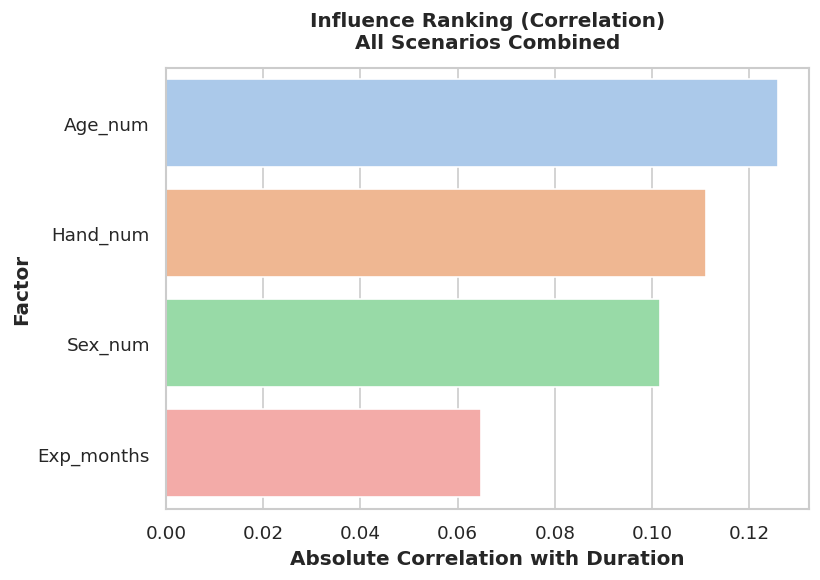

In [53]:
rank_all = factor_rank(meta_all, "All Scenarios Combined")


===== Factor Influence Ranking (Scenario S1) =====
       Factor  Correlation  AbsCorrelation
0     Age_num     0.270692        0.270692
1  Exp_months    -0.188273        0.188273
2     Sex_num    -0.051526        0.051526
3    Hand_num     0.051526        0.051526


/tmp/ipython-input-81253844.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


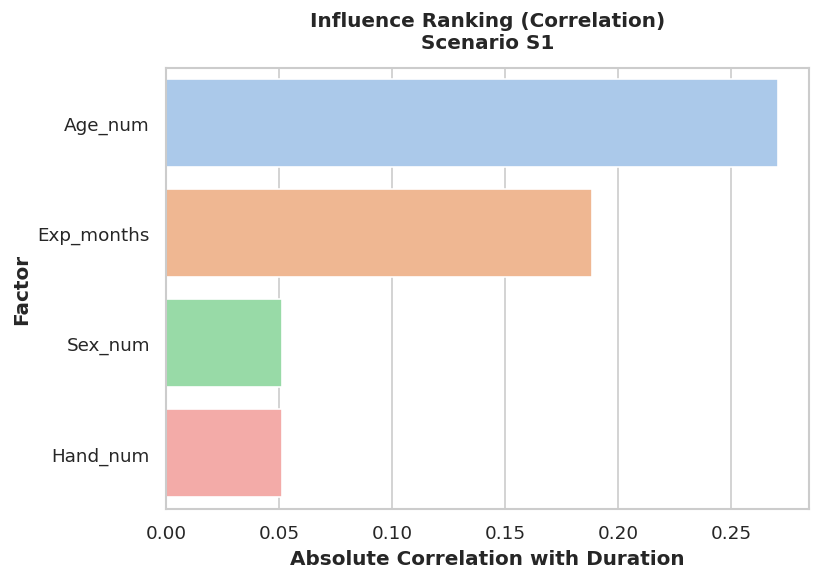

In [54]:
rank_s1 = factor_rank(meta_s1, "Scenario S1")


===== Factor Influence Ranking (Scenarios S2–S4 Combined) =====
       Factor  Correlation  AbsCorrelation
0     Age_num    -0.636356        0.636356
2     Sex_num     0.431031        0.431031
1  Exp_months     0.159895        0.159895
3    Hand_num          NaN             NaN


/tmp/ipython-input-81253844.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


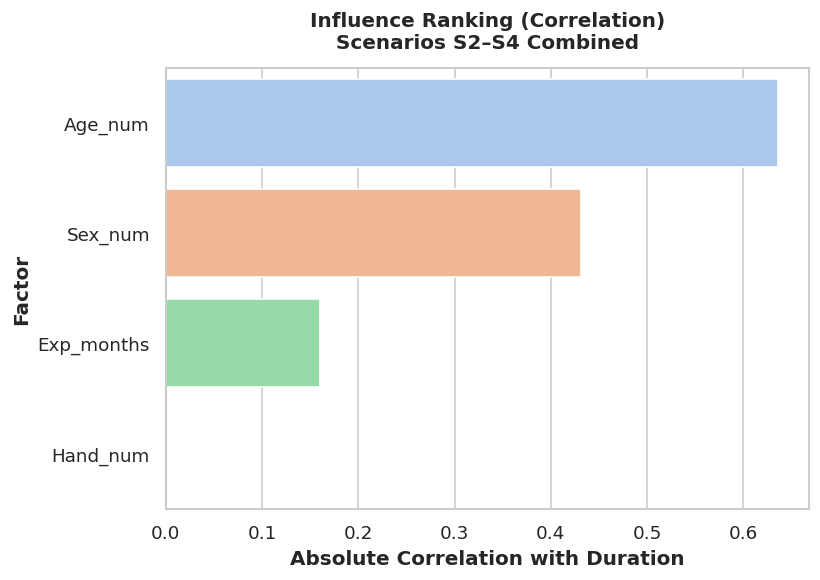

In [55]:
rank_s234 = factor_rank(meta_s234, "Scenarios S2–S4 Combined")